In [1]:
import pandas as pd
import numpy as np
import matplotlib as pyplot
%matplotlib inline

In [2]:
train = pd.read_csv(r'C:\Users\198353\Downloads\HR analytics\train.csv')
test = pd.read_csv(r'C:\Users\198353\Downloads\HR analytics\test.csv')

In [3]:
#import pandas_profiling    # entire data profiling carried out
#pandas_profiling.ProfileReport(train)

In [8]:
train['recruitment_channel'].value_counts()

other       30446
sourcing    23220
referred     1142
Name: recruitment_channel, dtype: int64

In [9]:
train['gender'].value_counts()

m    38496
f    16312
Name: gender, dtype: int64

In [10]:
train['region'].value_counts()

region_2     12343
region_22     6428
region_7      4843
region_15     2808
region_13     2648
region_26     2260
region_31     1935
region_4      1703
region_27     1659
region_16     1465
region_28     1318
region_11     1315
region_23     1175
region_29      994
region_32      945
region_19      874
region_20      850
region_14      827
region_25      819
region_17      796
region_5       766
region_6       690
region_30      657
region_8       655
region_10      648
region_1       610
region_24      508
region_12      500
region_9       420
region_21      411
region_3       346
region_34      292
region_33      269
region_18       31
Name: region, dtype: int64

In [11]:
y = train.iloc [:,-1]
x = train.iloc [:,1:13]

In [12]:
x.dtypes

department               object
region                   object
education                object
gender                   object
recruitment_channel      object
no_of_trainings           int64
age                       int64
previous_year_rating    float64
length_of_service         int64
KPIs_met >80%             int64
awards_won?               int64
avg_training_score        int64
dtype: object

In [13]:
numeric_data = x.select_dtypes(include=[np.number])
cat_data = x.select_dtypes(exclude=[np.number])
cat_data

,department,region,education,gender,recruitment_channel
0,Sales & Marketing,region_7,Master's & above,f,sourcing
1,Operations,region_22,Bachelor's,m,other
2,Sales & Marketing,region_19,Bachelor's,m,sourcing
3,Sales & Marketing,region_23,Bachelor's,m,other
4,Technology,region_26,Bachelor's,m,other
5,Analytics,region_2,Bachelor's,m,sourcing
6,Operations,region_20,Bachelor's,f,other
7,Operations,region_34,Master's & above,m,sourcing
8,Analytics,region_20,Bachelor's,m,other
9,Sales & Marketing,region_1,Master's & above,m,sourcing


In [14]:
x['education'] = x['education'].replace(np.NaN, "Bachelor's")

In [15]:
x['previous_year_rating'] = x['previous_year_rating'].fillna(3)

In [16]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
var_mod = ['department','region','education','gender','recruitment_channel']
for i in var_mod:
           x[i] = le.fit_transform(x[i])

In [17]:
from sklearn.model_selection import train_test_split
xtrain, xtest, ytrain, ytest = train_test_split(x, y, test_size=0.30, random_state = 10)

In [18]:
print (xtrain.shape, ytrain.shape)
print (xtest.shape, ytest.shape)

(38365, 12) (38365,)
(16443, 12) (16443,)


In [19]:
# xgboost
import xgboost as xgb
model = xgb.XGBClassifier()
print(model)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=1, gamma=0, learning_rate=0.1, max_delta_step=0,
       max_depth=3, min_child_weight=1, missing=None, n_estimators=100,
       n_jobs=1, nthread=None, objective='binary:logistic', random_state=0,
       reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
       silent=True, subsample=1)


In [20]:
from sklearn.model_selection import cross_val_score,GridSearchCV
f1_scores = cross_val_score(model, xtrain, ytrain, cv=5, scoring='f1')
print("F1-score = ",f1_scores," Mean F1 score = ",np.mean(f1_scores))

C:\Users\198353\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\198353\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\198353\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\198353\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\preprocessing\labe

F1-score =  [0.39615846 0.39470517 0.40714286 0.38888889 0.42092747]  Mean F1 score =  0.4015645702413001


C:\Users\198353\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


In [21]:
params = {
     'learning_rate': [0.01],
     'n_estimators': [1000],
     'max_depth':[7,8],
     'reg_alpha':[0.4],
    } 

# first grid search for max_depth,min_child_weight then fix those and search for rest in same fashion
# parameter scale_pos_weight is quite important in case of imbalanced dataset

In [22]:
model = xgb.XGBClassifier( min_child_weight = 1,scale_pos_weight =2 )

In [23]:
gsearch = GridSearchCV(estimator = model, param_grid = params, cv = 3, verbose = 1)

In [24]:
gsearch.fit(xtrain, ytrain)
print("Best Parameters :",gsearch.best_params_)

Fitting 3 folds for each of 2 candidates, totalling 6 fits


C:\Users\198353\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\198353\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\198353\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\198353\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\preprocessing\labe

Best Parameters : {'learning_rate': 0.01, 'max_depth': 7, 'n_estimators': 1000, 'reg_alpha': 0.4}


In [25]:
# Updating the parameter as per grid search
params.update(gsearch.best_params_)

In [26]:
xgb_model = xgb.XGBClassifier(**params,min_child_weight = 1,scale_pos_weight =2)

In [27]:
xgb_model.fit(xtrain, ytrain)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=1, gamma=0, learning_rate=0.01, max_delta_step=0,
       max_depth=7, min_child_weight=1, missing=None, n_estimators=1000,
       n_jobs=1, nthread=None, objective='binary:logistic', random_state=0,
       reg_alpha=0.4, reg_lambda=1, scale_pos_weight=2, seed=None,
       silent=True, subsample=1)

In [28]:
prediction_xgb = xgb_model.predict_proba(xtest) #predict_proba givesprobabilities for the target (0 and 1 ) in array form

In [29]:
from sklearn.metrics import precision_recall_curve
precision, recall, thresholds = precision_recall_curve(ytest, prediction_xgb[:,1])  

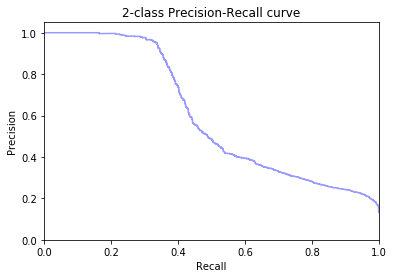

In [30]:
import matplotlib.pyplot as plt
thresholds = np.append(thresholds, 1)
f1_scores = 2*(precision*recall)/(precision+recall)
plt.step(recall, precision, color='b', alpha=0.4, where='post')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.ylim([0.0, 1.05])
plt.xlim([0.0, 1.0])
plt.title('2-class Precision-Recall curve')
plt.show()

In [ ]:
## Determine whether your model is overfitting or not , with the help of ROC.
print(confusion_matrix(ytest, prediction_xgb ))
predictions = [value for value in prediction_xgb]
accuracy = accuracy_score(ytest, predictions)
precision = precision_score(ytest, predictions)
recall = recall_score(ytest, predictions)
f1 = f1_score(ytest, predictions)
print("Accuracy_score: %.2f%% on test dataset" % (accuracy * 100.0))
print("precision_score: %.2f%% on test dataset" % (precision * 100.0))
print("recall_score: %.2f%% on test dataset" % (recall * 100.0))
print("f1_score: %.2f%% on test dataset" % (f1 * 100.0))
print("roc_auc test set", roc_auc_score(ytest, model.predict_proba(xtest)[:,1]))
print("roc_auc training set", roc_auc_score(ytrain, model.predict_proba(xtrain)[:,1]))

In [31]:
thresholds.shape

(10359,)

Threshold cutoff:  0.45983707904815674
Max F1-score at cut-off :  0.5203021718602455


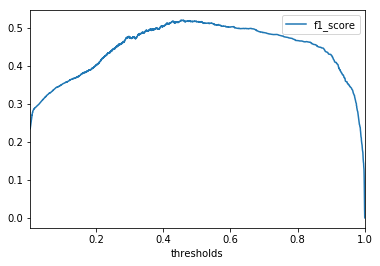

In [32]:
scrs = pd.DataFrame({'precision' : precision, 'recal' : recall, 'thresholds' : thresholds, 'f1_score':f1_scores})
print("Threshold cutoff: ",scrs.loc[scrs['f1_score'] == scrs.f1_score.max(),'thresholds'].iloc[0])
print("Max F1-score at cut-off : ",scrs.f1_score.max())
scrs.plot(x='thresholds', y='f1_score')

In [33]:
import pandas_profiling    
pandas_profiling.ProfileReport(test)

Number of variables,13
Number of observations,23490
Total Missing (%),0.9%
Total size in memory,2.3 MiB
Average record size in memory,104.0 B
Numeric,6
Categorical,5
Boolean,2
Date,0
Text (Unique),0
Rejected,0


In [45]:
test.dtypes

employee_id               int64
department               object
region                   object
education                object
gender                   object
recruitment_channel      object
no_of_trainings           int64
age                       int64
previous_year_rating    float64
length_of_service         int64
KPIs_met >80%             int64
awards_won?               int64
avg_training_score        int64
dtype: object

In [46]:
test['education'] = test['education'].replace(np.NaN, "Bachelor's")
test['previous_year_rating'] = test['previous_year_rating'].fillna(3)

In [57]:
identifier = test.iloc [:,0]
x_test = test.iloc [:,1:13]

In [58]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
var_mod = ['department','region','education','gender','recruitment_channel']
for i in var_mod:
           x_test[i] = le.fit_transform(x_test[i])

In [59]:
prediction = xgb_model.predict_proba(x_test)

In [60]:
prediction

array([[7.3160225e-01, 2.6839775e-01],
       [9.9886096e-01, 1.1390380e-03],
       [9.9964619e-01, 3.5382697e-04],
       ...,
       [9.9912488e-01, 8.7511278e-04],
       [9.9185717e-01, 8.1428392e-03],
       [1.0732311e-01, 8.9267689e-01]], dtype=float32)

In [61]:
prediction[:,1] =(prediction[:,1] > 0.45).astype(int)

In [71]:
prediction[:,1].shape

(23490,)

In [72]:
data = pd.DataFrame(prediction[:,1])

In [73]:
data.shape

(23490, 1)

In [70]:
data.to_csv(r'C:\Users\198353\Downloads\HR analytics\submission.csv', index=False)